# Fetal Health - Model tuning

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
data.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [5]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [6]:
X=data.drop(['fetal_health'],axis=1)
y=data['fetal_health']

## Data Visualization 

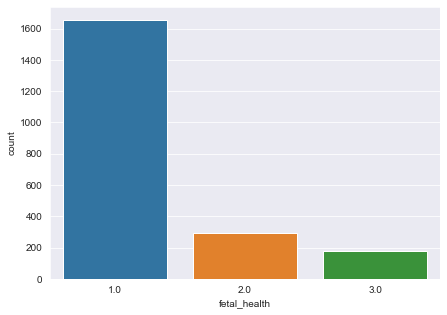

In [7]:
plt.rcParams['figure.figsize']=7,5
sns.set_style(style='darkgrid')
sns.countplot(x='fetal_health',data=data)
plt.show()

Observation: An highly Imbalanced Dataset. Which is obvious as Normal would be dominant.

Solution: Oversampling of the minority classes. To make better predictions.(Will perform later in the notebook)

<AxesSubplot:>

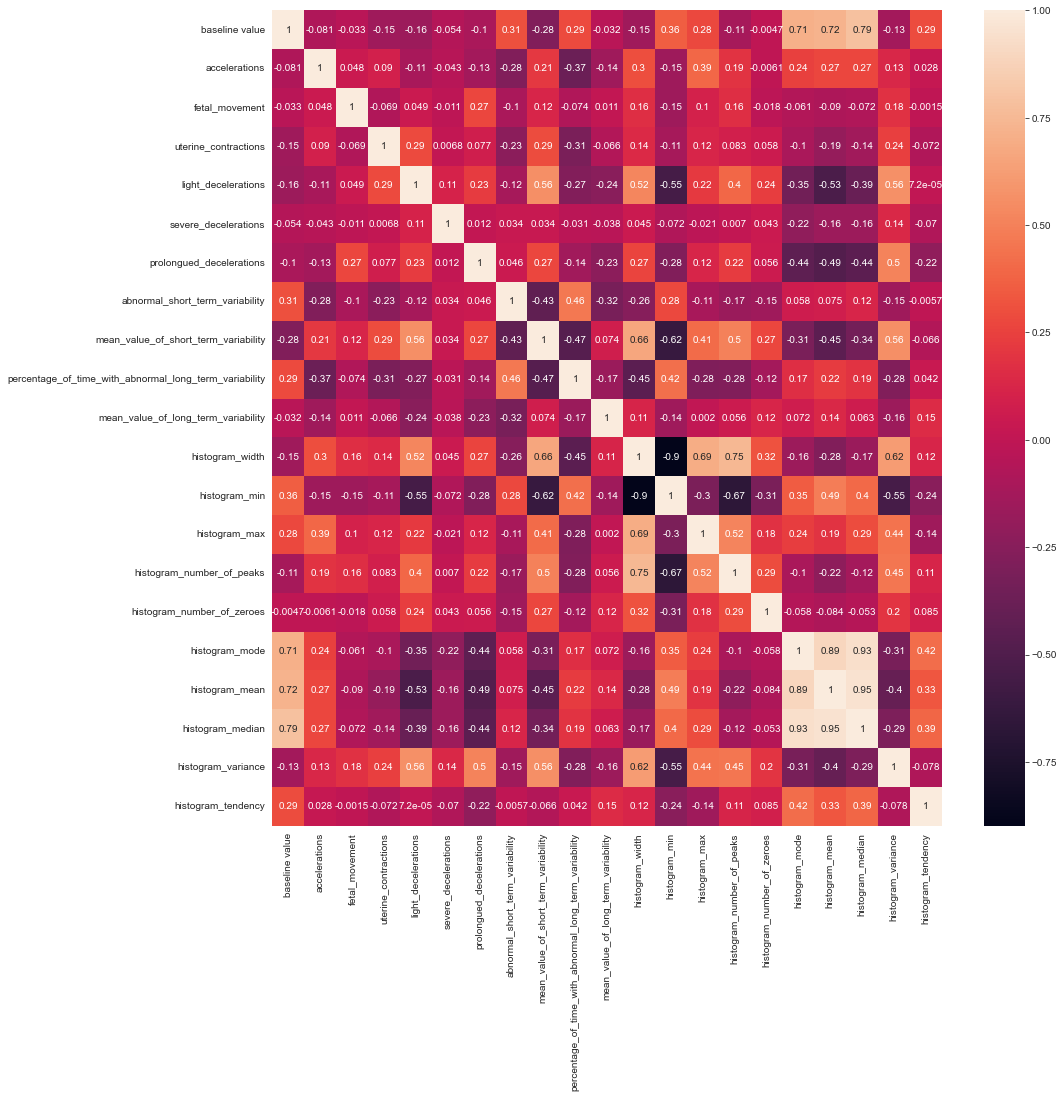

In [8]:
corr=X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

In [9]:
grouped=data.groupby(by='fetal_health').mean()
grouped

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
fetal_health,,,,,,,,,,,,,,,,,,,,,
1.0,131.981873,0.003992,0.007963,0.004781,0.001941,6.042296e-07,0.000051,42.465861,1.430634,5.044713,...,73.400000,91.085801,164.485801,4.163142,0.335347,138.258610,135.102115,138.459819,17.479758,0.341994
2.0,141.684746,0.000275,0.008332,0.002390,0.000536,0.000000e+00,0.000095,61.901695,0.638983,29.030508,...,49.159322,113.294915,162.454237,3.311864,0.244068,146.555932,144.759322,147.071186,7.213559,0.433898
3.0,131.687500,0.000392,0.025676,0.003784,0.003670,3.409091e-05,0.001273,64.539773,1.575568,22.846591,...,78.346591,83.982955,162.329545,4.443182,0.346591,114.607955,112.977273,119.562500,50.732955,-0.073864


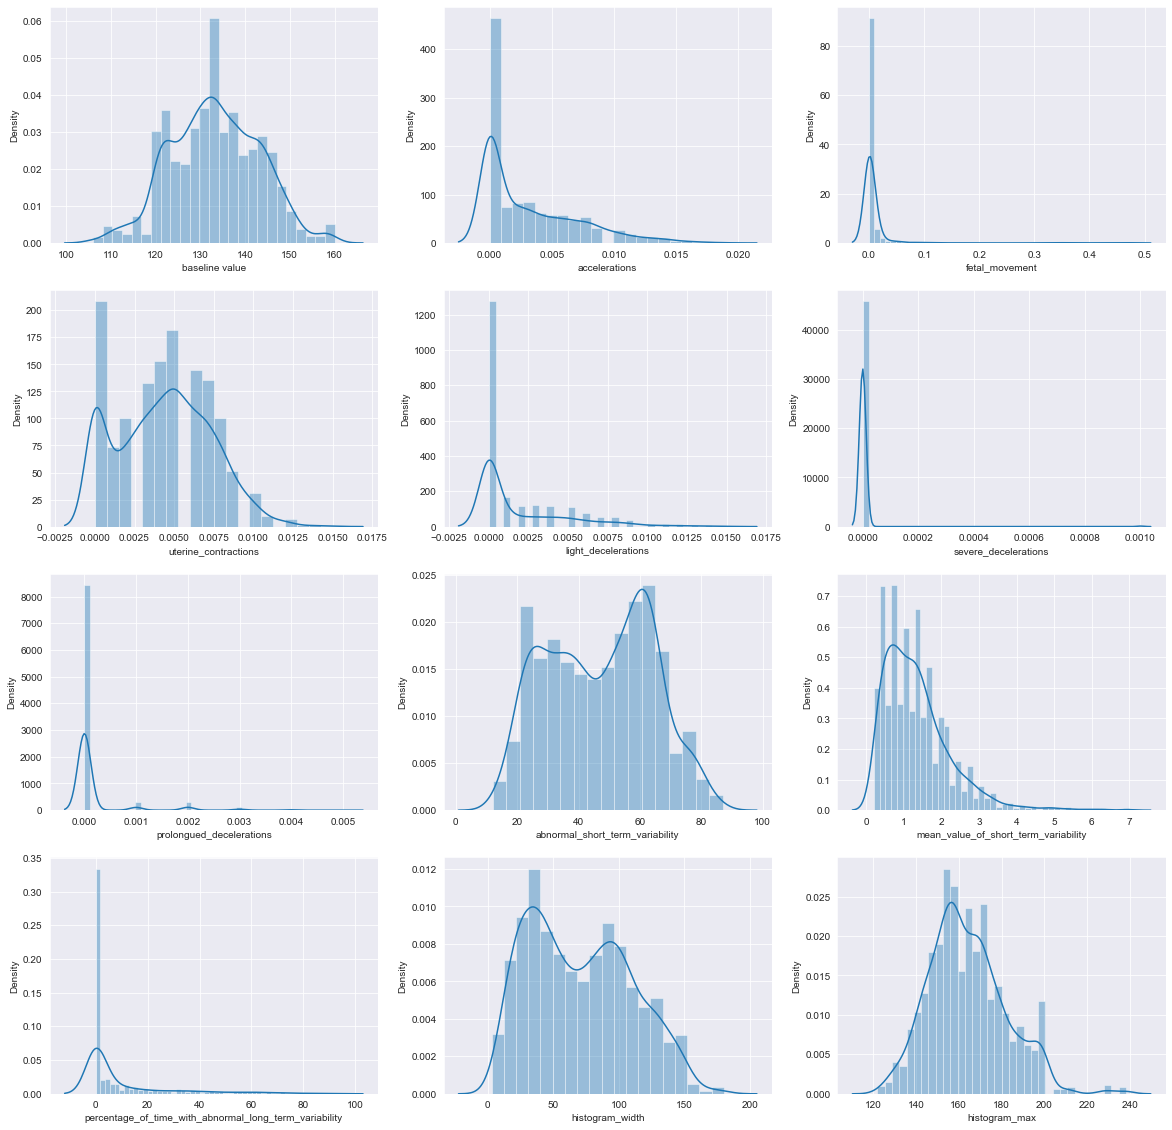

In [10]:
plt.rcParams['figure.figsize']=20,20
plt.subplot(4,3,1)
sns.distplot(X['baseline value'])

plt.subplot(4,3,2)
sns.distplot(X['accelerations'])

plt.subplot(4,3,3)
sns.distplot(X['fetal_movement'])

plt.subplot(4,3,4)
sns.distplot(X['uterine_contractions'])

plt.subplot(4,3,5)
sns.distplot(X['light_decelerations'])

plt.subplot(4,3,6)
sns.distplot(X['severe_decelerations'])

plt.subplot(4,3,7)
sns.distplot(X['prolongued_decelerations'])

plt.subplot(4,3,8)
sns.distplot(X['abnormal_short_term_variability'])

plt.subplot(4,3,9)
sns.distplot(X['mean_value_of_short_term_variability'])

plt.subplot(4,3,10)
sns.distplot(X['percentage_of_time_with_abnormal_long_term_variability'])

plt.subplot(4,3,11)
sns.distplot(X['histogram_width'])

plt.subplot(4,3,12)
sns.distplot(X['histogram_max'])

plt.show()

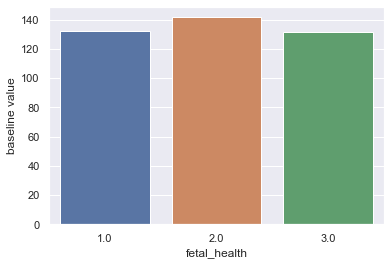

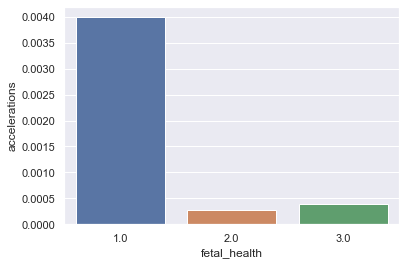

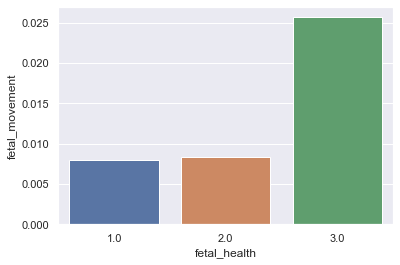

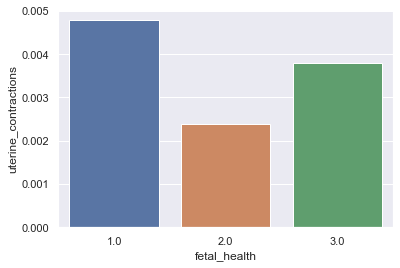

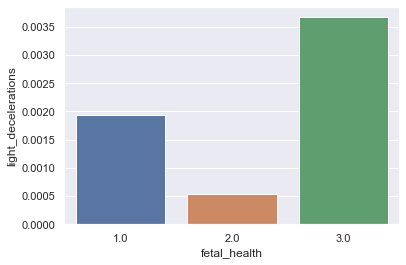

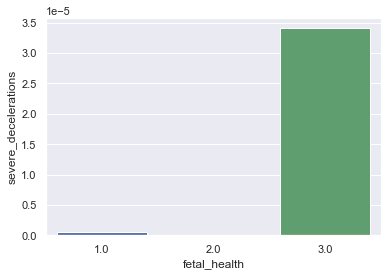

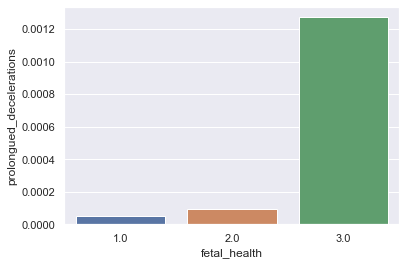

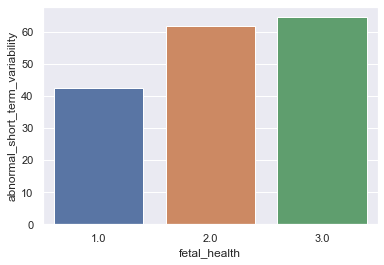

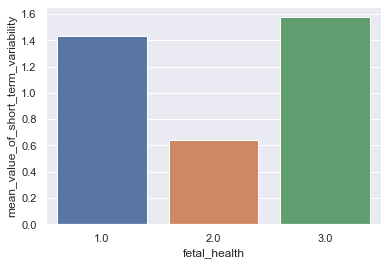

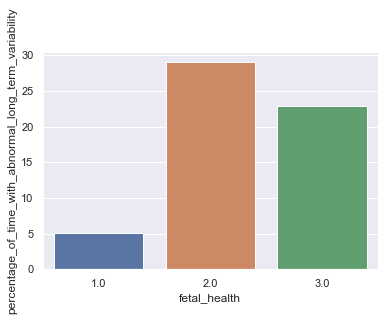

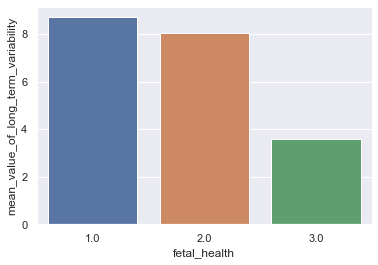

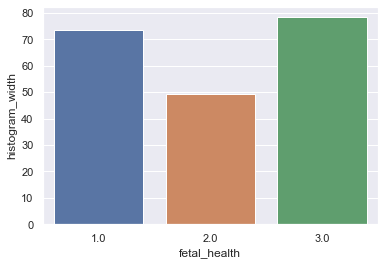

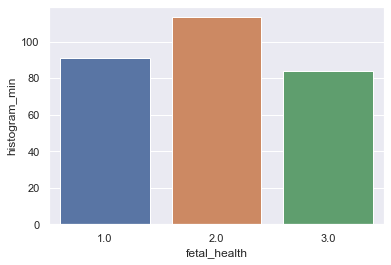

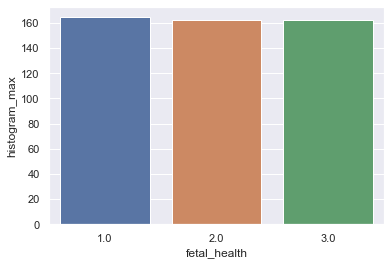

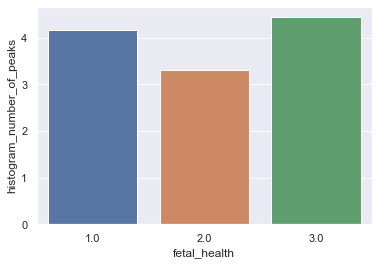

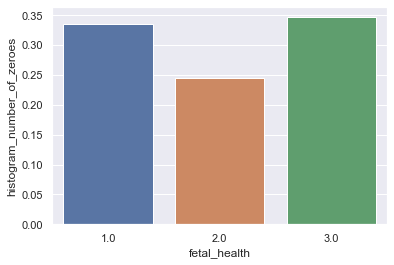

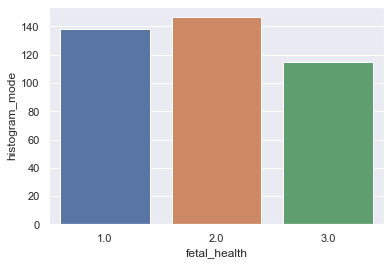

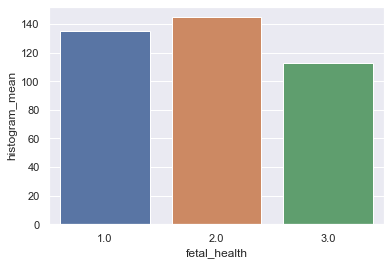

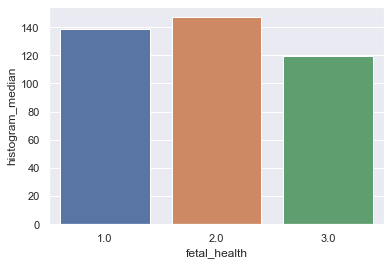

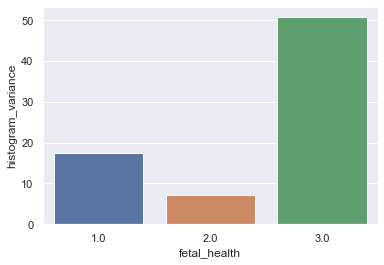

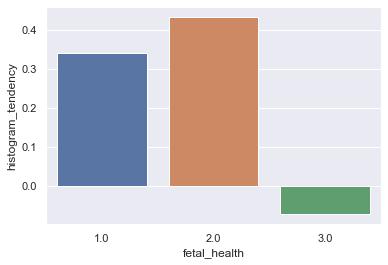

In [11]:
sns.set()
for index,i in enumerate(grouped.columns,start=1):
    plt.figure(figsize=(6,4))
    sns.barplot(data=grouped,x=grouped.index,y=grouped[i])
    plt.show()

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

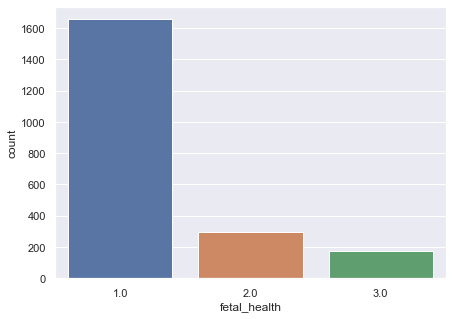

In [12]:
plt.rcParams['figure.figsize']=7,5
sns.countplot(data['fetal_health'])
# imbalanced data

# Oversampling of Minority Class

In [13]:
# for balancing the target 
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X, y)

In [14]:
y_over

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4960    3.0
4961    3.0
4962    3.0
4963    3.0
4964    3.0
Name: fetal_health, Length: 4965, dtype: float64

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

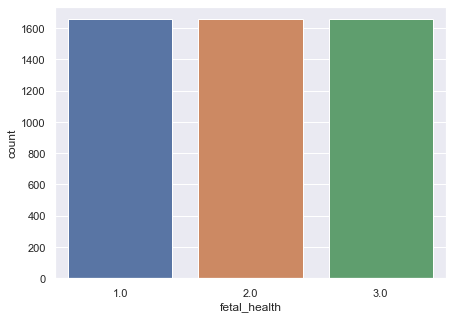

In [15]:
plt.rcParams['figure.figsize']=7,5
sns.countplot(y_over)

# Model Building

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_over,y_over,random_state=42,stratify=y_over)

In [17]:
X_train[:5]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
2875,142.0,0.000,0.0,0.006,0.0,0.0,0.0,59.0,0.4,32.0,...,22.0,141.0,163.0,1.0,0.0,155.0,153.0,155.0,1.0,0.0
4110,123.0,0.000,0.0,0.000,0.0,0.0,0.0,76.0,0.2,85.0,...,11.0,118.0,129.0,1.0,0.0,123.0,122.0,124.0,0.0,0.0
1268,119.0,0.001,0.0,0.006,0.0,0.0,0.0,26.0,1.2,0.0,...,39.0,106.0,145.0,1.0,0.0,120.0,122.0,122.0,3.0,0.0
4741,151.0,0.000,0.0,0.000,0.0,0.0,0.0,47.0,0.7,70.0,...,8.0,154.0,162.0,0.0,0.0,159.0,158.0,160.0,0.0,0.0
2054,127.0,0.000,0.0,0.005,0.0,0.0,0.0,65.0,0.7,55.0,...,13.0,120.0,133.0,1.0,0.0,126.0,126.0,127.0,0.0,0.0


# Dimensionality Reduction 

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test =scaler.transform(X_test) 

In [19]:
X_train

array([[ 0.70732776, -0.52615895, -0.24480874, ...,  1.0825998 ,
        -0.5764446 , -0.3284938 ],
       [-1.19569384, -0.52615895, -0.24480874, ..., -0.57677694,
        -0.59988827, -0.3284938 ],
       [-1.59632997, -0.19061771, -0.24480874, ..., -0.68383351,
        -0.52955728, -0.3284938 ],
       ...,
       [-1.29585287, -0.19061771, -0.24480874, ..., -0.52324866,
        -0.52955728, -0.3284938 ],
       [-0.59473965, -0.52615895, -0.22956908, ..., -1.48675774,
        -0.27167698, -1.81089673],
       [ 0.70732776, -0.52615895, -0.24480874, ...,  0.76143011,
        -0.5764446 , -0.3284938 ]])

## Voting classifier with HARD voting

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier , RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score , classification_report

vc_hard = VotingClassifier(
              estimators = [('dtc',  DecisionTreeClassifier(random_state=0)),
                            ('lr', LogisticRegression()),
                            ('rfc', RandomForestClassifier(n_estimators=10,verbose=1,random_state=0)),
                            ('gsnb', GaussianNB()),
                            ('knc', KNeighborsClassifier()),
                            ('svc', SVC(probability=True))],
                           voting='hard')

vc_hard.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


VotingClassifier(estimators=[('dtc', DecisionTreeClassifier(random_state=0)),
                             ('lr', LogisticRegression()),
                             ('rfc',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=0,
                                                     verbose=1)),
                             ('gsnb', GaussianNB()),
                             ('knc', KNeighborsClassifier()),
                             ('svc', SVC(probability=True))])

In [21]:
y_test_pred_vch = vc_hard.predict(X_test)
y_test_pred_vch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


array([3., 2., 1., ..., 1., 3., 2.])

In [22]:
y_train_pred = vc_hard.predict(X_train)
accuracy_score(y_train,y_train_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.9723341391351061

In [23]:
accuracy_score(y_test, y_test_pred_vch)

0.9565217391304348

In [24]:
print(classification_report(y_test, y_test_pred_vch))

              precision    recall  f1-score   support

         1.0       0.99      0.92      0.95       414
         2.0       0.89      1.00      0.94       414
         3.0       1.00      0.96      0.98       414

    accuracy                           0.96      1242
   macro avg       0.96      0.96      0.96      1242
weighted avg       0.96      0.96      0.96      1242



<AxesSubplot:ylabel='count'>

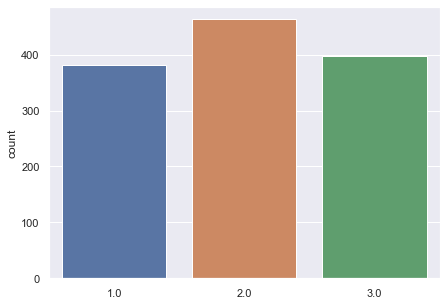

In [25]:
sns.countplot(y_test_pred_vch)

# GridSearchCV 

In [26]:
# to check parameters of model
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [27]:
from sklearn.model_selection import GridSearchCV

parameter = {   'bootstrap'   : [True],
                'max_depth'   : [i for i in range(3,20)],
                'criterion'   : ['entropy'],
                'n_estimators': [i for i in range(3,20)],
                'max_features': ['auto', 'log2']    }

gscv = GridSearchCV(RandomForestClassifier(),parameter,cv=10,n_jobs=-1,verbose=2)

gscv.fit(X_train,y_train)

Fitting 10 folds for each of 578 candidates, totalling 5780 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14, 15, 16, 17, 18, 19]},
             verbose=2)

In [28]:
gscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=18, max_features='log2',
                       n_estimators=18)

In [29]:
gscv.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 18,
 'max_features': 'log2',
 'n_estimators': 18}

In [30]:
gscv.best_score_

0.9900609703364178

# RandomisedSearchCV

In [31]:
from sklearn.model_selection import RandomizedSearchCV
parameter = {   'bootstrap'   : [True],
                'max_depth'   : [i for i in range(3,20)],
                'criterion'   : ['gini'],
                'n_estimators': [i for i in range(3,20)],
                'max_features': ['auto', 'log2']    }
randomcv = RandomizedSearchCV(RandomForestClassifier(),parameter,cv= 10 , n_jobs=-1)
randomcv.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13, 14, 15,
                                                         16, 17, 18, 19]})

In [32]:
randomcv.best_estimator_

RandomForestClassifier(max_depth=18, max_features='log2', n_estimators=16)

In [33]:
randomcv.best_params_

{'n_estimators': 16,
 'max_features': 'log2',
 'max_depth': 18,
 'criterion': 'gini',
 'bootstrap': True}

In [34]:
randomcv.best_score_

0.9868373259534723

In [37]:
txt = "Accuracy of Voting Classifier : {an:.2f} "
print(txt.format(an = accuracy_score(y_test, y_test_pred_vch)))

Accuracy of Voting Classifier : 0.96 


In [38]:
txt = "Accuracy of GridSearchCV : {an:.2f} "
print(txt.format(an = gscv.best_score_))

Accuracy of GridSearchCV : 0.99 


In [40]:
txt = "Accuracy of RandomisedSearchCV : {an:.2f} "
print(txt.format(an = randomcv.best_score_))

Accuracy of RandomisedSearchCV : 0.99 
